# Clustering for Diabetes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


In [5]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('DIABETE3', axis=1)
y = df['DIABETE3']

In [6]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000001DD044333A0>)

In [7]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', 'DRNKANY5', '_VEGLT1',

       'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4',

       'CVDCRHD4', 'CVDSTRK3', '_MICHD', 'CHCSCNCR', 'SMOKDAY2', 'USENOW3',

       '_SMOKER3', '_RFSMOK3'],

      dtype='object')


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd668112b50>,
                 estimator=KMeans(n_clusters=10, random_state=42), k=(1, 11))

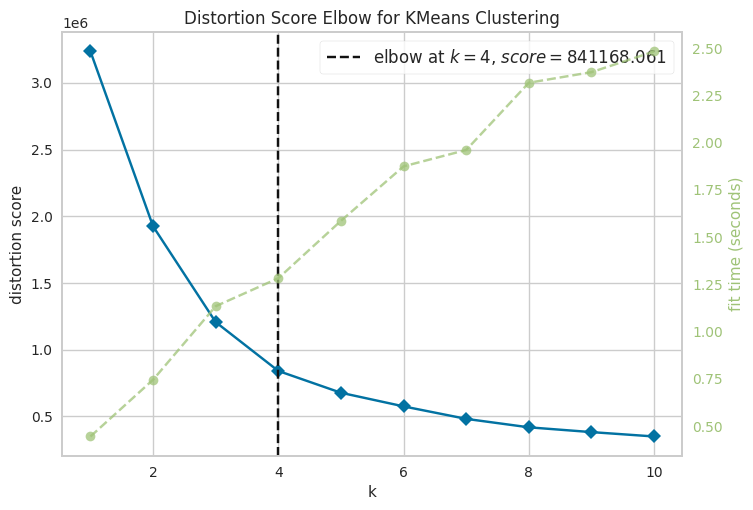

In [7]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','DIABETE3']
features = ['GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', 'DRNKANY5', '_VEGLT1',
       'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4',
       'CVDCRHD4', 'CVDSTRK3', '_MICHD', 'CHCSCNCR', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3','DIABETE3']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2','PC3'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering On Diabetes')

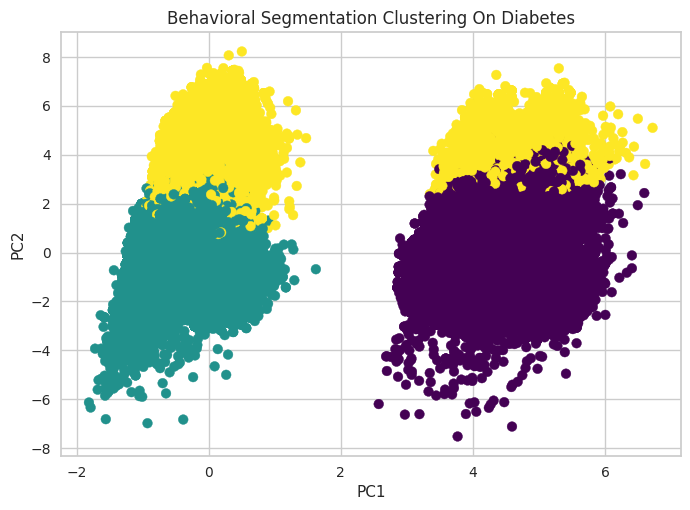

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
model = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=model, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering On Diabetes')
plt.show()

In [6]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
 #   cluster = clustered_data.loc[clustered_data['cluster'] == i]
  #  profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
   # profile.to_file(f"clustering10_{i}_profile.html")

Cluster Sizes:
Cluster 0: 325471
Cluster 1: 59761
Cluster 2: 56224

Cluster Means:
          GENHLTH  EXERANY2  _RFBING5  _RFDRHV5  DRNKANY5   _VEGLT1   BPHIGH4  \
cluster                                                                         
0        2.334017  1.191418  1.109140  1.045681  1.466548  1.159888  2.336700   
1        2.902395  1.342916  1.228410  1.107311  1.507388  1.249728  2.255384   
2        3.591705  1.438425  1.025505  1.013944  1.797880  1.245714  1.311202   

           BPMEDS  BLOODCHO   CHOLCHK   TOLDHI2  CVDINFR4  CVDCRHD4  CVDSTRK3  \
cluster                                                                         
0        1.058282  1.248975  1.333090  1.699488  2.021320  1.999554  1.991173   
1        1.098743  1.361189  1.388414  1.674922  1.973796  1.968943  1.972005   
2        1.070486  1.048520  1.079788  1.239915  1.632630  1.585782  1.857837   

           _MICHD  CHCSCNCR  SMOKDAY2   USENOW3  _SMOKER3  _RFSMOK3  DIABETE3  
cluster                  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('DIABETE3', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9649911656775246


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmeans.labels_)
kmeans_calinski = calinski_harabasz_score(daf, kmeans.labels_)
kmeans_davies = davies_bouldin_score(daf, kmeans.labels_)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  45970.42808121388
KMeans - Davies-Bouldin Index:  1.9695544183302482


### Diabetes Risk Prediction:

In [5]:
# Split data into features (X) and target variable (y)
X = daf.drop('DIABETE3', axis=1)
y = daf['DIABETE3']

# Add the cluster labels as a new column to the DataFrame
cluster_labels = kmeans.labels_
daf['cluster'] = cluster_labels

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Predict disease risk for new data
y_pred_log = model_log.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_log = model_log.score(X_test, y_test)
precision = precision_score(y_test, y_pred_log,average = 'macro')
recall = recall_score(y_test, y_pred_log,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_log)
print("Precision:", precision)
print("Recall:", recall)

LogisticRegression()

Accuracy: 0.84680378743261
Precision: 0.3398773973522902
Recall: 0.2814405367466633


Logistic Regression with GridSearchCV

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [15]:
def get_best_parameters_RandomSearchCV(model, params, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=5, n_iter=10)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    print(f'Best Parameters in {model}: {best_params}')
    print()

    best_estimator = random_search.best_estimator_
    return best_estimator

In [22]:
params_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [23]:
logreg_gscv = get_best_parameters_RandomSearchCV(model_log, params_logreg, X_train, y_train)
logreg_gscv = logreg_gscv.fit(X_train, y_train)

Best Parameters in LogisticRegression(): {'solver': 'sag', 'penalty': 'l2', 'C': 0.0018329807108324356}



In [24]:
# Accuracy test score for logreg_cv
logreg_gscv_acc = logreg_gscv.score(X_test, y_test)
print(f'Logistic Regression Model with RandomSearchCV Accuracy: {logreg_gscv_acc:.4}')
print()

# Make prediction on test dataset
y_pred_logreg_gscv = logreg_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_logreg_gscv, y_test))

Logistic Regression Model with RandomSearchCV Accuracy: 0.8464

              precision    recall  f1-score   support

         1.0       0.13      0.50      0.20      2966
         2.0       0.00      0.00      0.00         0
         3.0       0.98      0.86      0.92     85326
         4.0       0.00      0.00      0.00         0

    accuracy                           0.85     88292
   macro avg       0.28      0.34      0.28     88292
weighted avg       0.95      0.85      0.89     88292



In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score
# Train an SVM model on the training data
model_svm = SGDClassifier(loss='hinge')
model_svm.n_jobs = -1
model_svm.fit(X_train, y_train)

SGDClassifier(n_jobs=-1)

In [8]:
# Predict the health behavior for the test data
y_pred_svm = model_svm.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_svm = model_svm.score(X_test, y_test)
precision = precision_score(y_test, y_pred_svm,average = 'macro')
recall = recall_score(y_test, y_pred_svm,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8455126172246636
Precision: 0.2113781543061659
Recall: 0.25


In [18]:
params_svm = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [19]:
svm_gscv = get_best_parameters_RandomSearchCV(model_svm, params_svm, X_train, y_train)
svm_gscv = svm_gscv.fit(X_train, y_train)

Best Parameters in SGDClassifier(n_jobs=-1): {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 500, 'l1_ratio': 0.2, 'alpha': 0.01}



In [20]:
svm_gscv_acc = svm_gscv.score(X_test, y_test)
print(f'SVM Model with RandomSearchCV Accuracy: {svm_gscv_acc:.4}')
print()
y_pred_svm_gscv = svm_gscv.predict(X_test)
print(classification_report(y_pred_svm_gscv, y_test))

SVM Model with RandomSearchCV Accuracy: 0.8455

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.85      0.92     88292
         4.0       0.00      0.00      0.00         0

    accuracy                           0.85     88292
   macro avg       0.25      0.21      0.23     88292
weighted avg       1.00      0.85      0.92     88292



In [25]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier on the training data
model_dectree = DecisionTreeClassifier()
model_dectree.fit(X_train, y_train)

# Predict the disease risk for the test data
y_pred_dectree = model_dectree.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_dectree = model_dectree.score(X_test, y_test)
precision = precision_score(y_test, y_pred_dectree,average = 'macro')
recall = recall_score(y_test, y_pred_dectree,average = 'macro')
# Print the evaluation metrics
print("Accuracy:", accuracy_dectree)
print("Precision:", precision)
print("Recall:", recall)

DecisionTreeClassifier()

Accuracy: 0.8379581389027319
Precision: 0.3325513441572851
Recall: 0.28499929756468234


In [26]:
params_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
decision_tree_gscv = get_best_parameters_RandomSearchCV(model_dectree, params_decision_tree, X_train, y_train)
decision_tree_gscv = decision_tree_gscv.fit(X_train, y_train)

Best Parameters in DecisionTreeClassifier(): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}



In [28]:
# Accuracy test score for decisiontree_cv
decision_tree_gscv_acc = decision_tree_gscv.score(X_test, y_test)
print(f'Decision Tree Model with RandomSearchCV Accuracy: {decision_tree_gscv_acc:.4}')
print()
# Make prediction on test dataset
y_pred_decision_tree_gscv = decision_tree_gscv.predict(X_test)

# Classification Report of decisiontree_cv
print(classification_report(y_pred_decision_tree_gscv, y_test))

Decision Tree Model with RandomSearchCV Accuracy: 0.8467

              precision    recall  f1-score   support

         1.0       0.14      0.50      0.21      3102
         2.0       0.00      0.00      0.00        11
         3.0       0.98      0.86      0.92     85177
         4.0       0.00      0.00      0.00         2

    accuracy                           0.85     88292
   macro avg       0.28      0.34      0.28     88292
weighted avg       0.95      0.85      0.89     88292



In [29]:
from xgboost import XGBClassifier

# Train a gradient boosting classifier on the training data
model_gb = XGBClassifier(eval_metric='error')
model_gb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_gb = model_gb.score(X_test, y_test)
precision = precision_score(y_test, y_pred_gb,average = 'macro')
recall = recall_score(y_test, y_pred_gb,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_gb)
print("Precision:", precision)
print("Recall:", recall)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.8476532415167852
Precision: 0.5931075707852277
Recall: 0.27979241030594076


In [30]:
params_gradient_boosting = {'learning_rate': [4, 5, 6], 
              'max_depth': [4, 5, 6],
              'min_child_weight': [4, 5, 6],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'eval_metric': ['error']}

In [31]:
gradient_boosting_gscv = get_best_parameters_RandomSearchCV(model_gb, params_gradient_boosting, X_train, y_train)
gradient_boosting_gscv = gradient_boosting_gscv.fit(X_train, y_train)

Best Parameters in XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None): {'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 4, 'eval_metric': 'error', 'colsample_bytree': 1}



In [32]:
# Accuracy test score for logreg_cv
gradient_boosting_gscv_acc = gradient_boosting_gscv.score(X_test, y_test)
print(f'Gradient Boosting Model with RandomSearchCV Accuracy: {gradient_boosting_gscv_acc:.4}')
print()
# Make prediction on test dataset
y_pred_gradient_boosting_gscv = gradient_boosting_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_gradient_boosting_gscv, y_test))

Gradient Boosting Model with RandomSearchCV Accuracy: 0.7161

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.16      0.01      0.02     13124
         3.0       0.85      0.84      0.84     75168
         4.0       0.00      0.00      0.00         0

    accuracy                           0.72     88292
   macro avg       0.25      0.21      0.21     88292
weighted avg       0.74      0.72      0.72     88292



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the training data
model_ranfor = RandomForestClassifier()
model_ranfor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_ranfor = model_ranfor.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_ranfor = model_ranfor.score(X_test, y_test)
precision = precision_score(y_test, y_pred_ranfor,average = 'macro')
recall = recall_score(y_test, y_pred_ranfor,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_ranfor)
print("Precision:", precision)
print("Recall:", recall)

RandomForestClassifier()

Accuracy: 0.843304036605808
Precision: 0.3651006810079623
Recall: 0.282889998449479


In [34]:
params_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
random_forest_gscv = get_best_parameters_RandomSearchCV(model_ranfor, params_random_forest, X_train, y_train)
random_forest_gscv.n_jobs = -1
random_forest_gscv = random_forest_gscv.fit(X_train, y_train)

In [38]:
# Accuracy test score for logreg_cv
random_forest_gscv_acc = random_forest_gscv.score(X_test, y_test)
print(f'Random Forest Model with RandomSearchCV Accuracy: {random_forest_gscv_acc:.4}')
print()
# Make prediction on test dataset
y_pred_random_forest_gscv = random_forest_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_random_forest_gscv, y_test))

NameError: name 'random_forest_gscv' is not defined

in each cluster:

In [ ]:
from sklearn.linear_model import SGDClassifier

# Preprocess the data (scaling, handling missing values, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train a svc model


svcm = SGDClassifier(loss='hinge')
svcm.fit(X_train, y_train)

# Make predictions for the clusters based on the svc model
predicted_risk_scores = svcm.predict_proba(X_scaled)[:, 1]

# Assign the predicted risk scores to each cluster
X['PredictedRisk'] = predicted_risk_scores
X['Cluster'] = cluster_labels

# Calculate the average predicted risk score for each cluster
average_risk_scores = X.groupby('Cluster')['PredictedRisk'].mean()

# Print the predicted risk score for each cluster
for cluster, prediction in average_risk_scores.items():
    print(f"Cluster {cluster}: Predicted risk of diabetes score - {prediction}")

#### Evalutation:

In [30]:
# For Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

##### 1. Confusion Matrix:

Confusion matrix is a measurement technique for machine learning classification. It shows:

- **TP (True Positive):** Predicted values correctly predicted as actual positive.
- **FP (False Positive):** Predicted values incorrectly predicted an actual positive. (i.e., Negative values predicted as positive)
- **FN (False Negative):** Positive values predicted as negative.
- **TN (True Negative):** Predicted values correctly predicted as an actual negative.

In [31]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


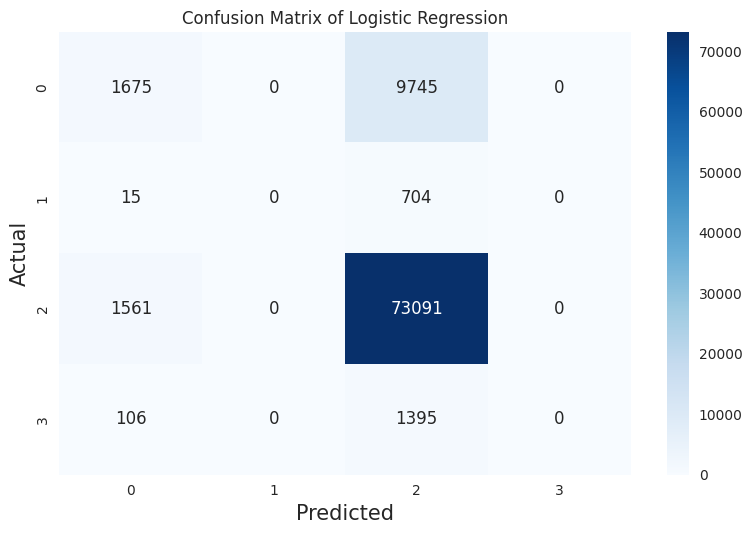

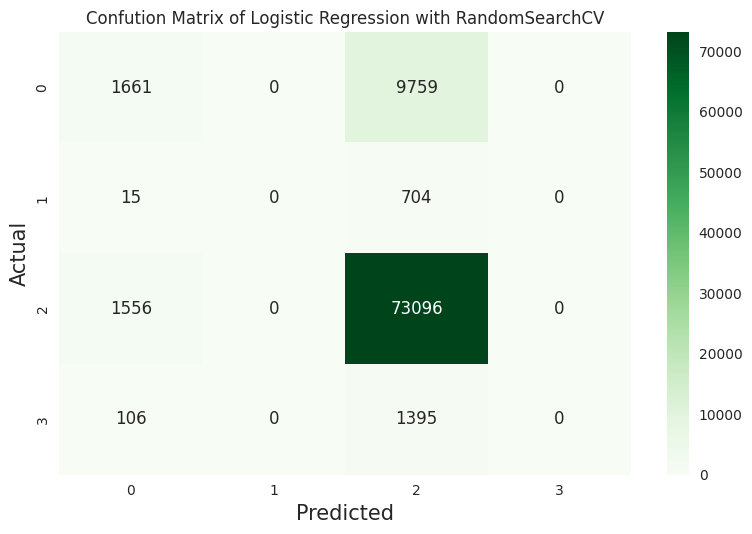

In [32]:
# Logistic Regression model
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(y_test, y_pred_log, 'Blues', title);
# Logistic Regression with GridSearchCV
title = 'Confution Matrix of Logistic Regression with RandomSearchCV'
plot_confusion_matrix(y_test, y_pred_logreg_gscv, 'Greens', title)

In [ ]:
# Random Forest model
title = 'Confution Matrix of Random Forest'
plot_confusion_matrix(y_test, y_pred_ranfor, 'Blues', title);
# Random Forest with hyperparameter tuning
title = 'Confution Matrix of Random Forest with RandomSearchCV'
plot_confusion_matrix(y_test, y_pred_random_forest_gscv, 'Greens', title)

In [15]:
# SVM model
title = 'Confution Matrix of SVM Model'
plot_confusion_matrix(y_test, y_pred_svm, 'Blues', title);
# SVM with parameter tuning
title = 'Confution Matrix of SVM Model with RandomSearchCV'
plot_confusion_matrix(y_test, y_pred_svm_gscv, 'Greens', title)

NameError: name 'y_pred_svm' is not defined

In [ ]:
# GB Classifier model
title = 'Confution Matrix of XGB Classifier'
plot_confusion_matrix(y_test, y_pred_gb, 'Blues', title);
# XGBoost Classifier with hyperparameter tuning
title = 'Confution Matrix of XGBoost Model with RandomSearchCV'
plot_confusion_matrix(y_test, y_pred_gradient_boosting_gscv, 'Greens', title)

In [ ]:
# Decision Tree Classifier model
title = 'Confution Matrix of Decision Tree Classifier'
plot_confusion_matrix(y_test, y_pred_dectree, 'Blues', title);
# XGBoost Classifier with hyperparameter tuning
title = 'Confution Matrix of Decision Tree Model with RandomSearchCV'
plot_confusion_matrix(y_test, y_pred_decision_tree_gscv, 'Greens', title)

##### 2. Learning Curve:

Learning curve shows the training score and the validation of a model for varying numbers of training samples.

In [33]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4, 
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)
    
    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    
    # Plot the learning curves
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


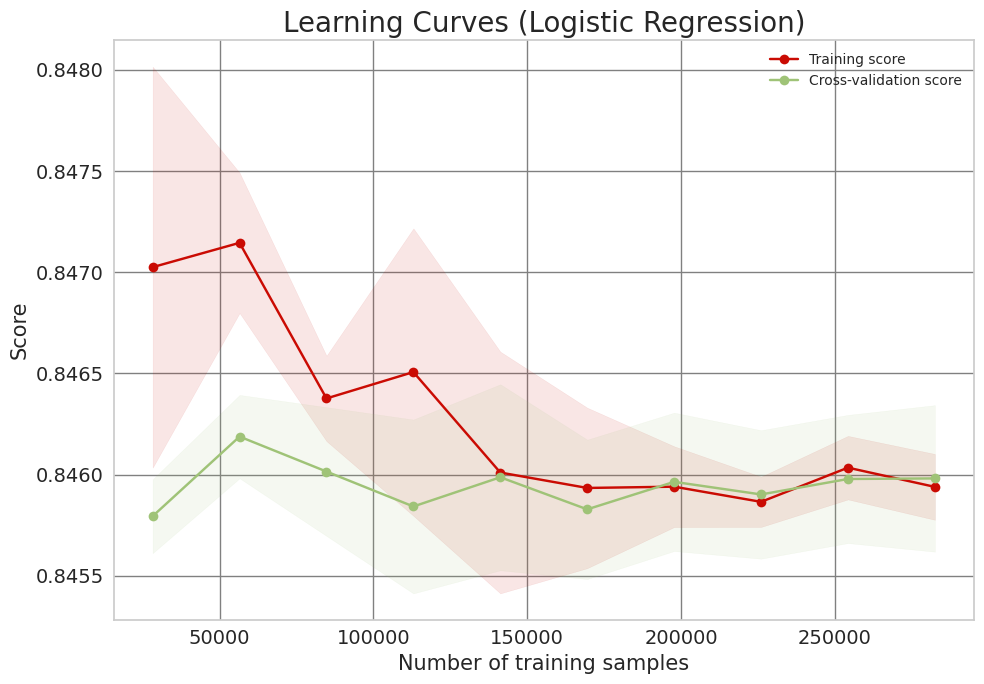

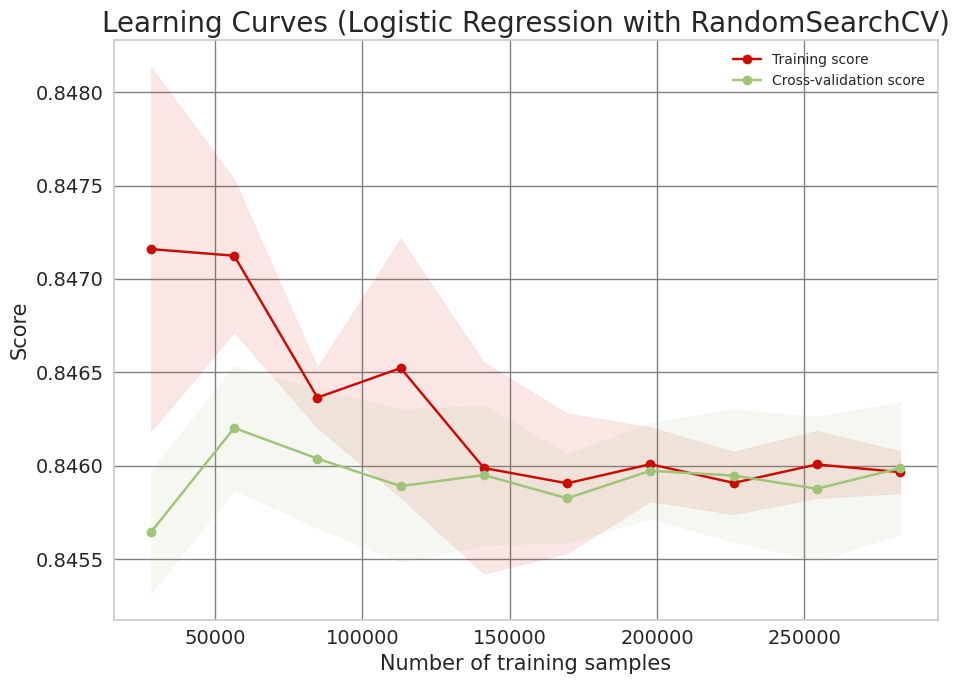

In [34]:
# Learning curve for Logistic Regression Models
title = 'Learning Curves (Logistic Regression)'
plot_learning_curve(model_log, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=10, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (Logistic Regression with RandomSearchCV)'
plot_learning_curve(logreg_gscv, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=10, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning curve for Random Forest models
title = 'Learning Curves (Random Forest Model)'
plot_learning_curve(model_ranfor, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));
title = 'Learning Curves (Random Forest Model with RandomSearchCV)'
plot_learning_curve(random_forest_gscv, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning curve for SVM models
title = 'Learning Curves (SVM Model)'
plot_learning_curve(model_svm, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

title = 'Learning Curves (SVM with RandomSearchCV)'
plot_learning_curve(svm_gscv, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning Curve for GB Classifier Model
title = 'Learning Curves (XGB Classifier Model)'
plot_learning_curve(model_gb, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));
title = 'Learning Curves (XGBoost Classifier with RandomSearchCV)'
plot_learning_curve(gradient_boosting_gscv, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

In [ ]:
# Learning Curve for Decision Tree Classifier Model
title = 'Learning Curves (Decision Tree Classifier Model)'
plot_learning_curve(model_dectree, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));
title = 'Learning Curves (Decision Tree Classifier with RandomSearchCV)'
plot_learning_curve(decision_tree_gscv, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10));

#### Model Comparaison:

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

In [39]:
# Get test and model tuning test score for each model
# Make lits of test score for each model and a model name list
#test_list = [accuracy_log, accuracy_dectree, accuracy_ranfor, accuracy_svm, accuracy_gb]
test_list = [accuracy_log, accuracy_dectree, accuracy_gb]
#tuning_test_list = [logreg_gscv_acc, decision_tree_gscv_acc, random_forest_gscv_acc, svm_gscv_acc, gradient_boosting_gscv_acc]
tuning_test_list = [logreg_gscv_acc, decision_tree_gscv_acc, gradient_boosting_gscv_acc]
#model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GBClassifier']
model_names = ['LogisticRegression', 'DecisionTree', 'GBClassifier']

# Make dataframes of each test score
test_list = pd.DataFrame(test_list)
tuning_test_list = pd.DataFrame(tuning_test_list)
model_names = pd.DataFrame(model_names)

# Name each column
test_list.columns = ['Default']
tuning_test_list.columns = ['with RandomSearchCV']
model_names.columns = ['model']

# Concatenate each column
over_all_score = pd.concat([model_names, test_list, tuning_test_list], axis=1)
print(over_all_score)

    
# Plot bar chart of each test score results
fig = go.Figure(data=[go.Bar(x=over_all_score['model'], y=over_all_score['Default'], 
                             name='Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}}),
                      go.Bar(x=over_all_score['model'], y=over_all_score['with RandomSearchCV'], 
                             name='Model Tuning Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}})])
fig.update_layout(title_text='Test and Model Tuning Test Results for each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_xaxes(title_text='Models', title_font={'size': 15})
fig.update_yaxes(title_text='Score', title_font={'size': 15})
fig.update_traces(marker={'line': {'color': 'Black', 'width': 1}})
fig.show()

                model   Default  with RandomSearchCV
0  LogisticRegression  0.846804             0.846702
1        DecisionTree  0.837811             0.846860
2        GBClassifier  0.847653             0.770466


In [44]:
# Randomly choose new individuals from the dataset
num_new_individuals = 2  # Specify the desired number of new individuals
new_individuals = daf.sample(n=num_new_individuals, replace=True)

# Generate random numbers for each column based on the dataset column values
for column in new_individuals.columns:
    if column != 'cluster':  # Skip the 'cluster' column
        unique_values = daf[column].unique()
        new_individuals[column] = np.random.choice(unique_values, size=num_new_individuals)
new_individuals.drop('DIABETE3',axis=1,inplace=True)
# Print the generated new individuals
print(new_individuals)

# Predict the health outcomes for new individuals
predicted_outcomes = logreg_gscv.predict(new_individuals)
print(predicted_outcomes)

        GENHLTH  EXERANY2  _RFBING5  _RFDRHV5  DRNKANY5  _VEGLT1  BPHIGH4  \
370686      1.0       1.0         1         1         1        2      1.0   
164298      4.0       1.0         1         2         7        1      1.0   

        BPMEDS  BLOODCHO  CHOLCHK  TOLDHI2  CVDINFR4  CVDCRHD4  CVDSTRK3  \
370686     2.0         2      1.0      2.0         7       1.0         7   
164298     2.0         1      1.0      2.0         7       2.0         2   

        _MICHD  CHCSCNCR  SMOKDAY2  USENOW3  _SMOKER3  _RFSMOK3  cluster  
370686     1.0       1.0       3.0      2.0         2         2        1  
164298     2.0       1.0       1.0      3.0         2         1        2  
[3. 1.]


In [45]:
# Define the personalized doctor recommendations for each segment
recommendations = {
    0: "Engage in regular physical activity and follow a balanced diet.",
    1: "Quit smoking and limit alcohol consumption for better health.",
    2: "Monitor blood pressure and cholesterol levels regularly and take prescribed medications.",
}


# Provide personalized doctor recommendations for each new individual
for segment in predicted_outcomes:
    if segment in recommendations:
        recommendation = recommendations[segment]
        print("Recommendation for Segment {}: {}".format(segment, recommendation))
    else:
        print("No specific recommendation available for Segment {}".format(segment))

No specific recommendation available for Segment 3.0
Recommendation for Segment 1.0: Quit smoking and limit alcohol consumption for better health.


In [74]:
doc_df=pd.read_csv("healthcare_docs.csv")
doc_df

,LastName,FirstName,CredentialType
0,Strange,Danielle,Registered Nurse Temporary Practice Permit
1,Chiang,Karin,Registered Nurse License
2,Hanspal,Jatinder,Nursing Assistant Certification
3,De La Cruz,Alexandra,Medical Assistant Phlebotomist Certification
4,Severin,Eric,Nursing Assistant Registration
...,...,...,...
1994,Carbajal Avila,Susana,Medical Assistant Certification
1995,Hampton,Kristopher,Emergency Medical Technician Certification
1996,Boparai,Sarbjit,Medical Assistant Phlebotomist Certification
1997,Burrows,Annamarie,Registered Nurse License


In [75]:
doc_df.rename(columns={'CredentialType': 'Specialty'},inplace=True)


In [77]:
doc_df['FullName'] = doc_df['LastName'].str.cat(doc_df['FirstName'], sep=' ')
doc_df.drop(["LastName","FirstName"],axis=1,inplace=True)
# Print the merged column
print(doc_df['FullName'])

0            Strange Danielle
1                Chiang Karin
2            Hanspal Jatinder
3        De La Cruz Alexandra
4                Severin Eric
                ...          
1994    Carbajal Avila Susana
1995       Hampton Kristopher
1996          Boparai Sarbjit
1997        Burrows Annamarie
1998              James Bryan
Name: FullName, Length: 1999, dtype: object


In [78]:
filtered_doc_df = doc_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

# Iterate over the DataFrame and drop rows containing "Nurse" or "Pharmacy" in the "Specialty" column
for index, row in doc_df.iterrows():
    if ("Nurse" in row['Specialty']) or ("Pharmacy" in row['Specialty']) or ("Nursing" in row['Specialty']) or ("Dental" in row['Specialty']):
        filtered_doc_df.drop(index, inplace=True)

# Reset the index of the filtered DataFrame
filtered_doc_df.reset_index(drop=True, inplace=True)

doc_df = filtered_doc_df
doc_df

,Specialty,FullName
0,Medical Assistant Phlebotomist Certification,De La Cruz Alexandra
1,Substance Use Disorder Professional Trainee Ce...,Sullivan Jana
2,Physician and Surgeon License Interstate Medic...,Fleming III Dallas
3,Emergency Medical Technician Certification,Siegert Ty
4,Medical Assistant Certification,Ganiron Gayle
...,...,...
949,Medical Program Director Delegate,Lonner Joseph
950,Medical Assistant Certification,Carbajal Avila Susana
951,Emergency Medical Technician Certification,Hampton Kristopher
952,Medical Assistant Phlebotomist Certification,Boparai Sarbjit


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

specialties = doc_df['Specialty'].fillna('').astype(str).tolist()  # Convert to list of strings

# Compute TF-IDF scores for the specialties
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(specialties)

# Convert predicted_outcomes to a list of strings
predicted_outcomes = [str(outcome) for outcome in predicted_outcomes]

# Compute the TF-IDF vector for each patient's predicted disease or risk category
patient_tfidf = tfidf_vectorizer.transform(predicted_outcomes)

# Calculate cosine similarity between each patient's TF-IDF vector and all doctors' TF-IDF vectors
similarity_scores = cosine_similarity(patient_tfidf, tfidf_matrix)

# Retrieve top N doctors based on similarity scores for each patient
top_n = 5  # Number of recommendations to retrieve

# Print the recommended doctors for each patient, only if there is a predicted risk
print("Recommended Doctors:")
for i in range(len(new_individuals)):
    patient = new_individuals.iloc[i]
    if predicted_outcomes[i] != 'No Risk':  # Check if there is a predicted risk
        patient_similarity_scores = similarity_scores[i]
        top_indices = patient_similarity_scores.argsort()[-top_n:][::-1]  # Indices of top recommendations

        print(f"Recommendations for Patient {i+1}:")
        for index in top_indices:
            doctor = doc_df.iloc[index]
            print(f"- {doctor['FullName']}, Specialty: {doctor['Specialty']}")
    else:
        print(f"No recommendations for Patient {i+1} as there is no predicted risk.")
    print()

Recommended Doctors:
Recommendations for Patient 1:
- James Bryan, Specialty: Medical Assistant Registration
- Kissel Delaney, Specialty: Counselor Agency Affiliated Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification

Recommendations for Patient 2:
- James Bryan, Specialty: Medical Assistant Registration
- Kissel Delaney, Specialty: Counselor Agency Affiliated Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification

